# Инфраструктура Python. Медиа

todo
Видео / анимация
* открыть из файла
* Скачать видео с youtube
* видео с экрана
* видео с вебкамеры
* отобразить в IPython
* извлечь аудио
* извлечь кадры
* Сшить обратно видео из кадров и аудио
* Стримить (клиент-браузер? клиент-плеер?)

Аудио
* отобразить в IPython
* ID3
* поменять частоты
* переконвертировать
* сгенерировать речь TTS
* подшить
* распознать речь
* спектрограмма
* MFCC -> t-SNE?

Изображения
* resize, rotate
* EXIF
* надписи, рисование
* блур
* сделать цветокоррекцию
* сохранить кадр отдельно
* отобразить в IPython


http://imageio.readthedocs.io/en/stable/userapi.html
    
http://imageio.readthedocs.io/en/latest/examples.html
        
https://github.com/Zulko/moviepy/blob/master/moviepy/video/io/gif_writers.py
    
https://github.com/marso329/python-video-streamer

http://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-sequences

## Изображения

Python в качестве GD использует библиотеку PIL http://pillow.readthedocs.io/en/latest/reference/Image.html

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


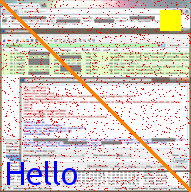

In [5]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
im = PIL.Image.open('files/wireshark.png')
im.thumbnail((192,192), PIL.Image.ANTIALIAS)
stars = randint(0, 191, (2000,2))
for star in stars:
    im.putpixel((star[0], star[1]), (255,0,0))

dr = PIL.ImageDraw.Draw(im)
dr.line((0,0, 200,200), fill=(255,128,0), width=3)
dr.rectangle((160,10,180,30), fill=(255,255,0))
dr.text((5,155), 'Hello', fill=(0,0,255), font=PIL.ImageFont.truetype('c:/windows/fonts/trebuc.ttf', 32))
im

todo im.resize

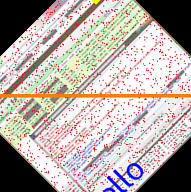

In [15]:
im.rotate(45, PIL.Image.BICUBIC)

Для конвертации между цветовыми схемами RGB, HSV, HLS, YIQ служит встроенная библиотека `colorsys`.

In [18]:
import colorsys

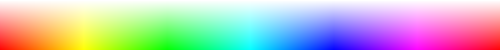

In [42]:
H, W = 50, 500
im = zeros((H, W, 3))
for i in range(H):
    for j in range(W):
        h = float(j) / W
        s = float(i) / H
        im[i,j,:] = colorsys.hsv_to_rgb(h,s,1)
PIL.Image.fromarray((im * 255).astype(uint8))

In [38]:
import PIL.ExifTags, PIL.Image
im = PIL.Image.open("C:\\Users\\User\\Downloads\\IMG_4692.jpg")
exif = {PIL.ExifTags.TAGS.get(k, k): v for k, v in im._getexif().items()}
if 'GPSInfo' in exif:
    exif['GPSInfo'] = {PIL.ExifTags.GPSTAGS.get(k, k): v for k, v in exif['GPSInfo'].items()}
exif

{'ApertureValue': (170, 32),
 'ColorSpace': 65535,
 'ComponentsConfiguration': '\x01\x02\x03\x00',
 'CompressedBitsPerPixel': (5, 1),
 'CustomRendered': 0,
 'DateTime': u'2006:03:02 11:07:04',
 'DateTimeDigitized': u'2006:02:11 11:06:37',
 'DateTimeOriginal': u'2006:02:11 11:06:37',
 'DigitalZoomRatio': (2272, 2272),
 'ExifImageHeight': 852,
 'ExifImageWidth': 1136,
 'ExifOffset': 240,
 'ExifVersion': '0220',
 'ExposureBiasValue': (0, 3),
 'ExposureMode': 0,
 'ExposureTime': (1, 500),
 'FNumber': (63, 10),
 'FileSource': '\x03',
 'Flash': 24,
 'FlashPixVersion': '0100',
 'FocalLength': (749, 32),
 'FocalPlaneResolutionUnit': 2,
 'FocalPlaneXResolution': (2272000, 280),
 'FocalPlaneYResolution': (1704000, 210),
 'GPSInfo': {'GPSAltitude': (304, 1),
  'GPSAltitudeRef': '\x00',
  'GPSLatitude': ((33, 1), (52, 1), (129675, 4096)),
  'GPSLatitudeRef': u'N',
  'GPSLongitude': ((116, 1), (18, 1), (23882, 4096)),
  'GPSLongitudeRef': u'W',
  'GPSMapDatum': u'WGS-84',
  'GPSVersionID': '\x02\x0

```
33 52' 31.65" N 116 18' 5.83" W
```

todo http://scikit-image.org/docs/dev/api/api.html

skimage.color, skimage.data, skimage.draw, skimage.feature, skimage.filter, skimage.io, skimage.measure, skimage.segmentation

```
conda install scikit-image
```

In [2]:
import skimage.filters

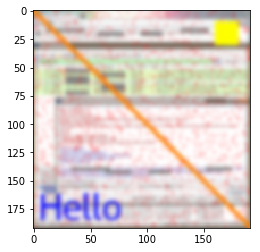

In [9]:
ima_ = skimage.filters.gaussian_filter(array(im), 2.0, multichannel=True)
imshow(ima_);

## Аудио

Лучшим найденным оффлайн-движком распознавания речи оказался `pocketsphinx`, обертка для которого есть в библиотеке `SpeechRecognition`. Увы, он поддерживает только английский, французский, китайский и итальянский языки.

```
pip install SpeechRecognition
pip install https://github.com/Uberi/speech_recognition/raw/master/third-party/pocketsphinx-0.1.3-cp27-cp27m-win_amd64.whl
или pip install pocketsphinx
```

In [1]:
%pylab inline
import moviepy.audio.io.AudioFileClip
import speech_recognition

Populating the interactive namespace from numpy and matplotlib


Попробуем распознать первые 30 секунд речи Фейнмана https://www.youtube.com/watch?v=v3pYRn5j7oI&list=PL322C334F17FABB17 и сравним с гугловыми субтитрами. Сырую звуковую дорожку в формате AAC `speech_recognition.AudioFile` понимать отказался.

todo youtube_dl?

In [2]:
audio = moviepy.audio.io.AudioFileClip.AudioFileClip("C:\\Users\\User\\Desktop\\feinman_audio.aac")
print audio.duration, audio.fps
arr = audio.to_soundarray()
print arr.shape, arr.dtype
arr_h = (arr[:,0] * (2 ** 16)).astype(uint16)
arr_hs = str(arr_h.data)
print len(arr_hs)
audio_fragment = arr_hs[:30 * audio.fps * 2]

438.07 44100


index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)

index 82100 is out of bounds for axis 0 with size 82100
  UserWarning)



(19318887L, 2L) float64
38637774


In [3]:
recognize_audio = speech_recognition.AudioData(audio_fragment, audio.fps, 2)

In [ ]:
#with speech_recognition.AudioFile("C:\\Users\\User\\Desktop\\feinman_audio.mp3") as source:
#    recognize_audio = r.record(source)

In [ ]:
#with speech_recognition.Microphone() as source:
#    recognize_audio = r.listen(source)

In [4]:
%%time
recognized = speech_recognition.Recognizer().recognize_sphinx(recognize_audio, language="en-US")

Wall time: 15.9 s


In [5]:
recognized

"it's interesting that some big fight science that so easy and others five hundred dollar difficult to his thirty two to some of them 'cause he didn't have a wider think perhaps will also be trimmed with lots of people love music and i'm the county to the youth and with a great deal of pleasure and i'll let the people who love pleasure who finds time to go to the case of science and that one of the things"

In [9]:
recognized_google = '''
it's interesting that some people find science so easy and others find it kind of dull and difficult
especially kids you know some of them are just heat it up and I don't know why it is it's the same perhaps but also
teach for instance lots of people love music and I never could carry a tune and it's I lose a great deal of pleasure
out of that and I think people lose a lot of pleasure who find a science doll in the case of science you think that
one of the things that make it very difficult is it takes
'''

In [7]:
from ultra import *

In [10]:
show_diff(recognized, recognized_google)

Даже не совсем чушь

todo

    pydub, pyaudio? fft, wavelets, разный DSP
        pyeeg is the one that has very good fractal dimensions computation but not installed here
        LPF with features
        signal.firwin signal.lfilter
        Shannon's entropy, spectral edge frequency and correlation matrix
        segments corresponding to frequency bands
        lvl = np.array([0.1, 4, 8, 12, 30, 70, 180])  # Frequency levels in Hz
        correlation matrix and its eigenvalues (b/w channels) (b/w freq)
        Spectral entropy for dyadic bands
        number of dyadic levels
        power spectrum at each dyadic level
        Fractal dimensions pyeeg.pfd pyeeg.hfd pyeeg.hurst pyeeg.hjorth
        Skewness Kurtosis

    import pyttsx -- похоже не умеет писать в файл

    как проиграть звук? -- ultra.tada воспроизвести файл tada.wav (мб из строки?)
    Написать функцию bingo, извещающую о конце долгой операции в ипутхоне

    чтение-запись ID3?


    import scipy.io
    import scipy.io.wavfile
    wavfile.write('file.wav', 44100, data)

    rate, x = wavfile.read...
    specgram(x)
    specgram(muson, NFFT=1024, Fs=частота дискретизации (число отсчетов в секунду), noverlap=900);
    noverlap : integer The number of points of overlap between blocks. The default value is 128. -- насколько перекрываются блоки для FFT (размером NFFT, noverlap должен быть 0..NFFT-1)

    Мел-кепстральными коэффициентами распознавать числа от 0 до 9, произнесенные TTS-движком

## Видео

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Для удобного создания видео можно использовать библиотеку `moviepy`, которая умеет все, что умеет ffmpeg (в том числе webm &rarr; gif) и умеет качать его при необходимости. http://zulko.github.io/moviepy/

In [81]:
from moviepy.editor import VideoClip
from PIL import Image
import numpy, math

w, h = 64, 64

def make_frame(t):
    antialias = 4
    c = int((math.sin(t * math.pi) + 1.0) / 2 * 255)
    im = Image.new("RGB", (w * antialias, h * antialias), (c, c, c))
    im = im.resize((w, h), Image.LANCZOS)
    return numpy.asarray(im)

clip = VideoClip(make_frame, duration=2.0)
clip.write_gif("img2.gif", fps=25)


[MoviePy] Building file img2.gif with imageio


 98%|████████████████████████████████████████▏| 50/51 [00:00<00:00, 495.05it/s]


In [145]:
clip.ipython_display(fps=25)

 98%|████████████████████████████████████████▏| 50/51 [00:00<00:00, 304.88it/s]


In [56]:
im = PIL.Image.open('19505730.gif')
frames = [frame.convert('RGB') for frame in PIL.ImageSequence.Iterator(im)]

In [1]:
import imageio
from io import BytesIO

In [94]:
io = BytesIO()
writer = imageio.get_writer(io, format='gif')
for frame in frames:
    writer.append_data(array(frame))
writer.close()
len(io.getvalue())

14857318

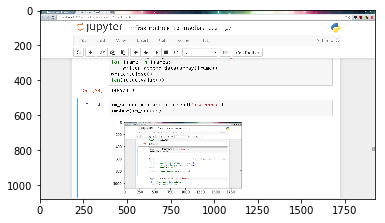

In [5]:
im_screen = imageio.imread('<screen>')
imshow(im_screen);

todo

In [90]:
im_screen = imageio.imread('<video0>')

SyntaxError: not a PNG file

In [16]:
import PIL.ImageSequence

In [72]:
im = PIL.Image.open('img2.gif')
for frame in PIL.ImageSequence.Iterator(im):
    print frame.width, array(frame.convert('RGB')).mean(),

64 127.0 64 143.0 64 159.0 64 174.0 64 188.0 64 202.0 64 214.0 64 225.0 64 235.0 64 242.0 64 248.0 64 252.0 64 254.0 64 254.0 64 252.0 64 248.0 64 242.0 64 235.0 64 225.0 64 214.0 64 202.0 64 188.0 64 174.0 64 159.0 64 143.0 64 127.0 64 111.0 64 95.0 64 80.0 64 66.0 64 52.0 64 40.0 64 29.0 64 19.0 64 12.0 64 6.0 64 2.0 64 0.0 64 0.0 64 2.0 64 6.0 64 12.0 64 19.0 64 29.0 64 40.0 64 52.0 64 66.0 64 80.0 64 95.0 64 111.0


In [47]:
from io import BytesIO
io = BytesIO()
clip.write_gif(io, fps=25)

ValueError: Could not find a format to write the specified file in mode '?'


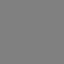

In [70]:
import IPython, PIL.Image
from ultra import png2img, file_get
IPython.display.HTML(png2img(file_get('img2.gif')).replace('image/png', 'image/gif'))

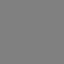

In [6]:
PIL.Image.open('img2.gif')

todo PIL не поддерживает анимированные гифки? IPython? Можно ли выводить APNG, чтобы не было проблем с цветами?

In [7]:
import IPython
IPython.display.HTML('<img src="files/img2.gif">')

todo Как писать видеофайлы в памяти?

todo Как стримить?

todo

чтение-запись видео, анимации gif, webp -- pymedia? Pyffmpeg?

    Как сделать видео, которое будет играться в видео-тэге

    VIDEO_TAG = """<video controls width="640" height="360">
        <source src="data:video/webm;base64,{0}" type="video/webm">
        Your browser does not support the video tag.
    </video>"""
    
    или src="data:video/mp4;base64,..."

    anim.save(f.name, fps=fps, extra_args=['-vcodec', 'libvpx'])


    ffmpeg -i {input}.mov -vcodec h264 -acodec aac -strict -2 {output}.mp4
    поддерживаются ogv (Theora), mp4 (H.264), webm
    ffmpeg -i test_mpeg.avi -codec:v libtheora -qscale:v 7 -codec:a libvorbis -qscale:a 5 output.ogv
    Хорошо бы понять, как писать сразу в ogv http://experienceopencv.blogspot.com.tr/2012/04/adding-ogg-video-to-videowriter.html

## QR

Самой повседневной задачей классического машинного зрения, которая революционизировала логистику и розничную торговлю, является задача распознавания штрих-кодов. Их распознавание включено в библиотеку `zbar`.

todo сбилдить zbar, ZXing, zbarlight https://habr.com/post/213291/

In [52]:
import zbar

ImportError: No module named zbar

In [ ]:
qr = pyqrcode.create("HORN O.K. PLEASE.")
qr.png("horn.png", scale=6)

import qrtools
qr = qrtools.QR()
qr.decode("horn.png")
print qr.data

## Классическое машинное зрение

todo OpenCV, image processing, фильтры Собеля, Viola-Jones framework, SURF

https://github.com/handee/opencv-gettingstarted

    opencv
	http://anaconda.org/menpo/opencv все же есть opencv под анаконду?
	похоже все же есть conda install opencv (2.4.10) -- http://anaconda.org/anaconda/opencv/files

	Anaconda Windows x64
	conda install -c http://conda.anaconda.org/menpo opencv
		чтобы работал cv2.VideoCapture из файла, надо взять свежий opencv и скопировать в Anaconda2/Lib/site-packages оттуда opencv\build\python\2.7\x64\cv2.pyd и opencv\build\x64\vc10\bin\opencv*.dll
		http://stackoverflow.com/questions/23119413/how-to-install-python-opencv-through-conda/33908648

Веб-камера? VideoCapture, an extension for accessing video devices.
    
VideoCapture.get(CV_CAP_PROP_POS_MSEC) # FRAME_COUNT, FPS, FRAME_WIDTH, FRAME_HEIGHT

VideoCapture.set(CV_CAP_PROP_POS_FRAMES, frame_idx)

Вычитание фона, сегментация?

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


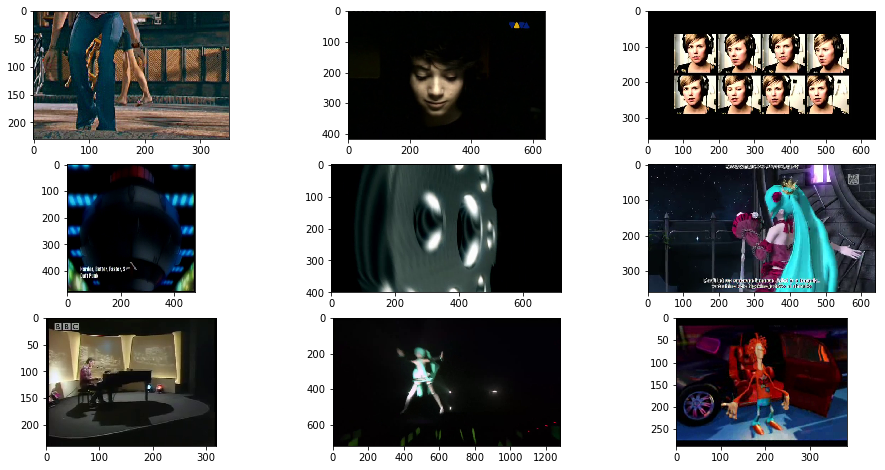

In [10]:
import cv2
filenames = [
    "D:\\(clips)\\Las Ketchup - Asereje.avi",
    "D:\\(clips)\\Jem - They.divx",
    "D:\\(clips)\\Pomplamoose - Telephone.flv",
    "D:\\(clips)\\Daft Punk-Harder Better Faster Stronger.m2v",
    "D:\\(clips)\\Kamelot - One Cold Winter's Night.mkv",
    "D:\\(clips)\\Miku Hatsune - Romeo and Cinderella.mov",
    "D:\\(clips)\\Hugh Laurie's Song for America - A Bit of Fry and Laurie - BBC.mp4",
    "D:\\(clips)\\14710280649770.webm",
    "D:\\(clips)\\Reflex - Танцы.wmv",
]
figure(figsize=(16,8))
for i, filename in enumerate(filenames):
    video = cv2.VideoCapture(filename)
    video.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, 5 * video.get(cv2.cv.CV_CAP_PROP_FPS))
    success, frame = video.read()
    video.release()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    subplot(3, (len(filenames) + 2) / 3, i + 1)
    imshow(frame);

todo

In [ ]:
video = cv2.VideoCapture("D:\\(clips)\\Kamelot - One Cold Winter's Night.mkv")
while True:
    success, image = video.read()
    ret, jpeg = cv2.imencode('.jpg', image)
    frame = jpeg.tobytes()

todo

sample RTSP rtsp://184.72.239.149/vod/mp4:BigBuckBunny_175k.mov , должен читаться OpenCV, KMPlayer читает с артефактами

мб придется setting the environment variable OPENCV_FFMPEG_CAPTURE_OPTIONS to something (e.g. dummy).